## Statistic

In [50]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import json
import numpy as np
import matplotlib.font_manager as font_manager

In [28]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%)"

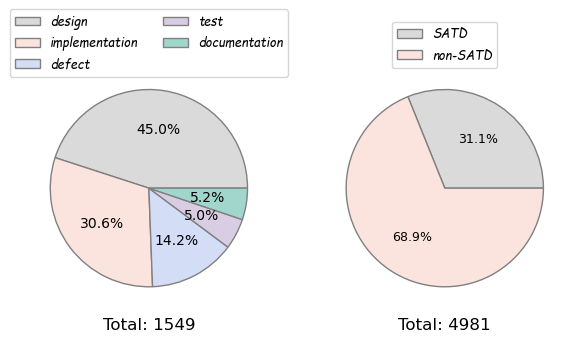

In [54]:
font = font_manager.FontProperties(family='Comic Sans MS',
                                   weight='normal',
                                   style='italic', size=9)


fig, axs = plt.subplots(1,2, figsize=(7, 5))

x = [697, 474, 220, 78, 80]
labels = ["design", "implementation", "defect", "test", "documentation"]
colors = ["#d9dad9", "#fbe4de", "#d3ddf6", "#d9cde3", "#a1d6cc"]

# Capture each of the return elements.
patches, texts, pcts = axs[0].pie(
    x, autopct='%.1f%%',
    wedgeprops={'linewidth': 1.0, 'edgecolor': 'grey'},
    textprops={'size': 'small', 'fontstyle': 'italic', 'weight': 'bold'}, colors= colors)
# Style just the percent values.
axs[0].legend(patches, labels,
          loc="upper center",
          bbox_to_anchor=(0.5, 1.25),
          ncols = 2,
          prop=font)

plt.setp(pcts, color='black', fontweight='normal', fontstyle= 'normal', fontsize=10)
axs[0].set_xlabel('Total: ' + str(sum(x)), fontsize=12)


x = [1549, 3432]
labels = ["SATD", "non-SATD"]
colors = ["#d9dad9", "#fbe4de", "#d3ddf6", "#d9cde3", "#a1d6cc"]

# Capture each of the return elements.
patches, texts, pcts = axs[1].pie(
    x, autopct='%.1f%%',
    wedgeprops={'linewidth': 1.0, 'edgecolor': 'grey'},
    textprops={'size': 'small', 'fontstyle': 'italic', 'weight': 'bold'}, colors= colors)
# Style just the percent values.
plt.setp(pcts, color='black', fontweight='normal', fontstyle= 'normal', fontsize=9)
axs[1].legend(patches, labels,
          loc="upper center",
          bbox_to_anchor=(0.5, 1.2),
          ncols = 1,
          prop=font)

axs[1].set_xlabel('Total: ' + str(sum(x)), fontsize=12)
plt.savefig('data_distribution.pdf', bbox_inches='tight')

## Examples

In [1]:
from datasets import load_dataset
data = load_dataset("NamCyan/tesoro", split="train")

In [28]:
filter_comments = data.filter(lambda x: x["classification"] == "TEST")
select_design = [0, 30]
select_implementation = [13, 92]
select_defect = [37, 42, 68]
select_doc = [2,24]

Filter:   0%|          | 0/4981 [00:00<?, ? examples/s]

In [130]:
id =46
print(filter_comments[id]["comment"])
print(filter_comments[id]["code"])

/**
     *
     * TODO figure out how to test this
     *
     * @throws Exception
     */
public void testEmit() throws Exception {
        eh.on("ok", new EventEmitter.Listener() {
            @Override
            public void onEvent(Object data) {
                String ss = (String) data;
                if (ss == "ok")
                    Log.d(TAG, "pass@" + ss);
                else
                    Log.d(TAG, "fail@" + ss);
            }
        });
        eh.on("no", new EventEmitter.Listener() {
            @Override
            public void onEvent(Object data) {
                String ss = (String) data;
                if (ss == "no")
                    Log.d(TAG, "pass@" + ss);
                else
                    Log.d(TAG, "fail@" + ss);
            }
        });
        eh.emit("ok");
        eh.emit("ok", "ok");
        eh.emit("ok", "no");
        eh.emit("no");
        eh.emit("no", "no");
        eh.emit("no", "ok");
        eh.emit("unknown");
        eh.